In [ ]:
pip install googletrans==4.0.0-rc1

In [1]:
pip install pyspellchecker

     |████████████████████████████████| 2.7MB 3.9MB/s 


In [3]:
pip install emoji

     |████████████████████████████████| 133kB 3.9MB/s 


In [3]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
from googletrans import Translator
#from google_trans_new import google_translator 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report

#google translate
translator = Translator(service_urls =['translate.google.com'])

#pyspellchecker
spell = SpellChecker()


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test.csv",skip_blank_lines=True,encoding = "latin") 
data

,Label,number,date,no_query,name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
4044,4,1932993697,Tue May 26 22:43:16 PDT 2009,NO_QUERY,caitlinduhhh,@estrella_bby hahah what do you want for grad...
4045,4,1932993722,Tue May 26 22:43:17 PDT 2009,NO_QUERY,MsXtina23,@chanel_latrice let's layout and swim tomorrow!
4046,4,1932993758,Tue May 26 22:43:17 PDT 2009,NO_QUERY,Trinity_B,@Tcell1 Hey.
4047,4,1932993765,Tue May 26 22:43:17 PDT 2009,NO_QUERY,Bowl_the_Bunny,@tweetnotpurge1 But you won out in the end - *...


In [6]:
l=[]
for i in data["Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

In [7]:
#dropping unwanted columns
data=data.drop(columns=['number', 'date','name','no_query','Label'])

In [8]:
data

,Tweet,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
4044,@estrella_bby hahah what do you want for grad...,positive
4045,@chanel_latrice let's layout and swim tomorrow!,positive
4046,@Tcell1 Hey.,positive
4047,@tweetnotpurge1 But you won out in the end - *...,positive


In [9]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [10]:
def contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [11]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [12]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=spell.correction(word.lower())
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)




In [14]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    #print(new_st)
    return new_st



In [15]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



In [16]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    return new_str


In [17]:
clean_list=[]
for i in data["Tweet"]:
    print()
    print(i)
    x=start(i)
    clean_list.append(x)
    print()
    print(x)
    print("-------------------------")

Streaming output truncated to the last 5000 lines.

Tomorrow... I will be rich  Just say'n. Positive imagery.

  tomorrow  rich say 's  positive imagery
-------------------------

Who really goes out on a tuesday nite?!?! Apparently me hahaha....at Atelier partaking in a few drinks!! 

  really go tuesday nite  apparently hahaha at atelier partake drink 
-------------------------

@KAYSTEEZY ha! but i DO! 

  ha 
-------------------------

Redid my Twitter BG to match my LJ. Go see!   #firefly

  redid twitter match la  go see  firefly
-------------------------

@sgdavis i cant begin to explain how happy it makes me that you spelt &quot;colour&quot; the canadian way 

  cant begin explain happy make spelt colour canadian way
-------------------------

ps im smacked 

  smack
-------------------------

folllow me and i'll follow you back  goooood niiight

  follow all follow back gooood night
-------------------------

@restlessfilms the grind is so serious man....haha...I'm good homie,

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)       

In [19]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

In [20]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [21]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

4842

In [23]:
#creating a frequency distribution of each adjectives. 
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

509

In [24]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

509

In [25]:
#after preprocessing data
data


,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,aww bummer shoulda get david carr third day...
1,is upset that he can't update his Facebook by ...,negative,upset not update facebook texting might cry ...
2,@Kenichan I dived many times for the ball. Man...,negative,dive many time ball manage save rest go bound
3,my whole body feels itchy and like its on fire,negative,le body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,misbehave mad not see
...,...,...,...
4044,@estrella_bby hahah what do you want for grad...,positive,haha want graduation
4045,@chanel_latrice let's layout and swim tomorrow!,positive,let us layout tomorrow
4046,@Tcell1 Hey.,positive,hey
4047,@tweetnotpurge1 But you won out in the end - *...,positive,end not ed major proud love


In [26]:
#assigning feature for each row in clean_tweets 
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)
    
data["cleaned_tweets"]=new_list

In [27]:
data

,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,third playful
1,is upset that he can't update his Facebook by ...,negative,upset not
2,@Kenichan I dived many times for the ball. Man...,negative,
3,my whole body feels itchy and like its on fire,negative,itchy
4,"@nationwideclass no, it's not behaving at all....",negative,mad not
...,...,...,...
4044,@estrella_bby hahah what do you want for grad...,positive,
4045,@chanel_latrice let's layout and swim tomorrow!,positive,
4046,@Tcell1 Hey.,positive,
4047,@tweetnotpurge1 But you won out in the end - *...,positive,not major proud love


In [28]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [29]:
x_train.shape

(3441, 2)

In [30]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

In [31]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({'ill': True, 'next': True, 'stupid': True}, 'negative'),
 ({}, 'positive'),
 ({}, 'negative'),
 ({'mean': True, 'not': True, 'really': True}, 'negative'),
 ({'another': True, 'beautiful': True}, 'positive'),
 ({'horrible': True, 'truth': True}, 'negative'),
 ({'love': True}, 'positive'),
 ({}, 'negative'),
 ({'next': True}, 'positive'),
 ({}, 'negative'),
 ({'funny': True, 'good': True, 'odd': True}, 'positive'),
 ({'sweet': True}, 'negative'),
 ({'stiff': True}, 'positive'),
 ({'sick': True}, 'negative'),
 ({'late': True}, 'negative'),
 ({}, 'negative'),
 ({'not': True, 'soon': True}, 'negative'),
 ({}, 'positive'),
 ({'great': True, 'love': True, 'proud': True}, 'positive'),
 ({'great': True}, 'positive'),
 ({'not': True, 'really': True, 'sad': True}, 'negative'),
 ({'easily': True, 'never': True}, 'negative'),
 ({}, 'negative'),
 ({'itchy': True}, 'negative'),
 ({'emotional': True, 'late': True}, 'negative'),
 ({}, 'negative'),
 ({'especially': True, 'mean': True}, 'positive'),
 

In [32]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [33]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [34]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)
print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 64.14473684210526

Most Informative Features
                     sad = True           negati : positi =     12.2 : 1.0
                    sick = True           negati : positi =     10.8 : 1.0
                    dead = True           negati : positi =      9.7 : 1.0
                    poor = True           negati : positi =      8.2 : 1.0
                    huge = True           negati : positi =      6.4 : 1.0
                  smiley = True           positi : negati =      6.3 : 1.0
               yesterday = True           negati : positi =      5.8 : 1.0
               wonderful = True           positi : negati =      5.6 : 1.0
                  lonely = True           negati : positi =      5.0 : 1.0
                    evil = True           negati : positi =      5.0 : 1.0
                   proud = True           positi : negati =      5.0 : 1.0
                   happy = True           positi : negati =      4.7 : 1.0
           

In [35]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])

print("Multinomail naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 64.30921052631578
Multinomail naive bayes

              precision    recall  f1-score   support

    positive       0.74      0.46      0.57       311
    negative       0.60      0.83      0.69       297

    accuracy                           0.64       608
   macro avg       0.67      0.65      0.63       608
weighted avg       0.67      0.64      0.63       608



In [36]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 64.47368421052632
Bernouli naive bayes

              precision    recall  f1-score   support

    positive       0.75      0.46      0.57       311
    negative       0.60      0.84      0.70       297

    accuracy                           0.64       608
   macro avg       0.67      0.65      0.63       608
weighted avg       0.67      0.64      0.63       608



In [37]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Logistic Regression classifier accuracy percent: 63.81578947368421
Logistic regression

              precision    recall  f1-score   support

    positive       0.73      0.47      0.57       311
    negative       0.59      0.82      0.69       297

    accuracy                           0.64       608
   macro avg       0.66      0.64      0.63       608
weighted avg       0.66      0.64      0.63       608



In [38]:
#Stochastic Gradient Descent classifier
SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SGD_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SGD_clf, test_set_formatted))*100,"SGD"])


classifiers.append([SGD_clf,"SGD classifier"])

print("Stochastic Gradient Descent\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 62.664473684210535
Stochastic Gradient Descent

              precision    recall  f1-score   support

    positive       0.70      0.48      0.57       311
    negative       0.59      0.78      0.67       297

    accuracy                           0.63       608
   macro avg       0.64      0.63      0.62       608
weighted avg       0.64      0.63      0.62       608



In [39]:
#Support vector classifier 
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 61.8421052631579
Support vector classifier

              precision    recall  f1-score   support

    positive       0.69      0.46      0.55       311
    negative       0.58      0.78      0.67       297

    accuracy                           0.62       608
   macro avg       0.64      0.62      0.61       608
weighted avg       0.64      0.62      0.61       608



In [40]:
#Max Entropy classifier
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

def max_ent(training_set_formatted):
    numIterations = 100
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(10)
    return classifier
    
maxent_classifier=max_ent(training_set_formatted)


ground_truth = [r[1] for r in test_set_formatted]

preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]

f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"MaxEnt"])


classifiers.append([maxent_classifier,"Max Entropy classifier"])

print("Max Entropy\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.501
             2          -0.69260        0.681
             3          -0.69206        0.681
             4          -0.69152        0.681
             5          -0.69098        0.681
             6          -0.69045        0.681
             7          -0.68991        0.681
             8          -0.68938        0.681
             9          -0.68885        0.681
            10          -0.68831        0.681
            11          -0.68779        0.681
            12          -0.68726        0.681
            13          -0.68673        0.681
            14          -0.68621        0.681
            15          -0.68569        0.681
            16          -0.68517        0.681
            17          -0.68465        0.681
            18          -0.68413        0.681
            19          -0.68362        0.681
 

In [41]:
from nltk.classify import ClassifierI
from statistics import mode 

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
  

In [42]:
# Initializing the ensemble classifier 
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])

    # List of only feature dictionary from the featureset list of tuples 
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Accuracy of hybrid :  63.81578947368421
Hybrid

              precision    recall  f1-score   support

    positive       0.73      0.46      0.57       311
    negative       0.59      0.82      0.69       297

    accuracy                           0.64       608
   macro avg       0.66      0.64      0.63       608
weighted avg       0.66      0.64      0.63       608



In [43]:
accuracy

[[64.14473684210526, 'NB'],
 [64.30921052631578, 'MNB'],
 [64.47368421052632, 'BNB'],
 [63.81578947368421, 'LogReg'],
 [62.664473684210535, 'SGD'],
 [61.8421052631579, 'SVC'],
 [61.8421052631579, 'MaxEnt'],
 [63.81578947368421, 'Hybrid']]

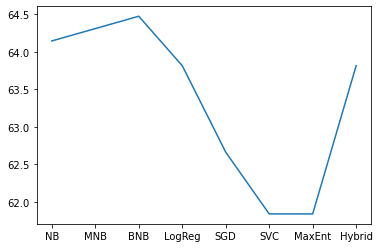

In [44]:
from matplotlib import pyplot as plt 
import numpy as np
  
# x-axis values 
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values 
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot 
plt.plot(y,x) 

  
# function to show the plot 
plt.show() 

Confusion matrix, without normalization
[[144 167]
 [ 53 244]]
Normalized confusion matrix
[[0.46 0.54]
 [0.18 0.82]]


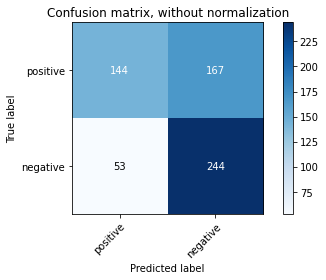

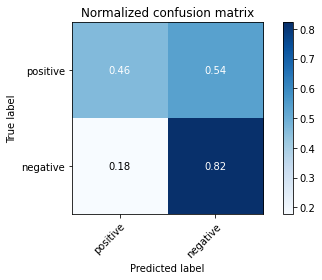

In [45]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



class_names = [ 'positive','negative']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [47]:
def text_classify(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Tweet is ",determined_label)
        print("------------------------------")
    c=0
    print("Hybrid model")
    testset_data=[]
    testset_data.append([test_data,""])
    lab=hybrid(testset_data)
    print("This Tweet is ",lab[0])

In [48]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [49]:
from nltk.corpus import twitter_samples
 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
x=negative_tweets[:1000]
st=""
for i in x:
    st=st+" "+i
st

' hopeless for tmr :( Everything in the kids section of IKEA is so cute. Shame I\'m nearly 19 in 2 months :( @Hegelbon That heart sliding into the waste basket. :( “@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too Dang starting next week I have "work" :( oh god, my babies\' faces :( https://t.co/9fcwGvaki0 @RileyMcDonough make me smile :(( @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2" Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz I have a really good m&amp;g idea but I\'m never going to meet them :((( @Rampageinthebox mare ivan :( @SophiaMascardo happy trip, keep safe. see you soon :* :( I\'m so tired hahahah :( @GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch. relate to the "sweet n\' sour" kind of "bi-polar

In [50]:
text_classify(st)

['sad', 'cute', 'nearly', 'sad', 'sad', 'sad', 'next', 'sad', 'sad', 'sad', 'sad', 'really', 'good', 'idea', 'never', 'sad', 'sad', 'happy', 'safe', 'soon', 'sad', 'tired', 'sad', 'sweet', 'sour', 'kind', 'full', 'sad', 'sad', 'sad', 'stupid', 'not', 'basic', 'digital', 'sad', 'good', 'sad', 'lonely', 'sad', 'really', 'sad', 'hard', 'long', 'sad', 'sad', 'far', 'sad', 'truly', 'sad', 'safe', 'sad', 'sad', 'sad', 'sad', 'late', 'sad', 'sick', 'first', 'sad', 'sad', 'back', 'old', 'weird', 'pale', 'massive', 'rash', 'sad', 'sad', 'not', 'care', 'sad', 'cute', 'love', 'sad', 'busy', 'sad', 'next', 'love', 'sad', 'frightening', 'really', 'sad', 'sad', 'active', 'love', 'sad', 'incomplete', 'sad', 'sad', 'not', 'sad', 'bad', 'bad', 'sad', 'sad', 'really', 'sad', 'powerful', 'sad', 'sad', 'mammoth', 'dirty', 'clean', 'not', 'easy', 'green', 'well', 'sad', 'sad', 'hungry', 'sane', 'sad', 'sad', 'sad', 'love', 'true', 'sad', 'sad', 'sad', 'tired', 'sad', 'sad', 'massive', 'actually', 'genuine'

In [51]:
#input from the user which will be used to classify 
def hinglish(input_text):
    translator = Translator(service_urls=['translate.google.co.in'])
    x=translator.translate(input_text,src="hi",dest="en")
    text_classify(x.text)

In [52]:
#input from the user which will be used to classify 
from textblob import TextBlob

def hinglish2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        word=TextBlob(i)
        if(word.detect_language()=="hi"):
            translator = Translator(service_urls=['translate.google.co.in'])
            x=translator.translate(i,src="hi",dest="en")
            st=st+" "+x.text
        else:
            st=st+" "+i
    text_classify(st)

In [53]:
def func(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            hinglish(input_text)
    if(not(flag)):
        hinglish2(input_text)
            

In [55]:
func('Need a hug')

[]
Tweet given by user :  Need a hug
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [54]:
func("arrey waah! I'm very proud of you")

['proud']
Tweet given by user :  Arrey Waah!I'm Very Proud of You
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [ ]:
func("tum log pagal ho")

['mad']
Tweet given by user :  Are you mad?
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("tum pagal ho")

['mad']
Tweet given by user :  you are mad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("tum kharab ho")

['bad']
Tweet given by user :  You're bad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are foolish and horrible")

In [ ]:
func("you are not accha")

['evil']
Tweet given by user :   you are not good
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are unpleasant")

['unpleasant']
Tweet given by user :   you are unpleasant
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative
